# Activation functions

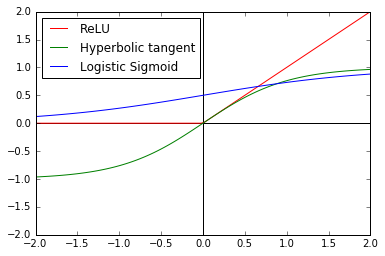

In [11]:
plotActivationFunctions([relu, tanh, logistic], ['ReLU', 'Hyperbolic tangent', 'Logistic Sigmoid'])

### Logistic Sigmoid

 - non-symmetric
 - more biologically accurate than Tanh [1]
  - Positive values only
 - when initialized with small weights output is around 0.5 
  - not biologically accurate
  - hurts gradient-based optimization


### Hyperbolic Tangent

 - anti-symmetric
 - faster backprop convergence than Sigmoid [3]
  - due to large gradient around 0
 - works well even though the forced antisymmetry around 0 is absent in biological neurons

### Rectified Linear Unit

 - one-sided
 
**Pros**
 - most biologically accurate of the three mentioned ones [1]
 - allows true zeros [1]
 - leads to truly sparse networks [1]
 - computationally cheaper than exponential functions
 
**Cons**
 - too much sparsity may hurt predictive performance for an equal number of neurons, because it reduces the effective capacity of the model [1]
 - unbounded => use regularizer to prevent potential numerical problems 
 - true zeros could hurt backprop => NO unless there is at least one path of non-zero units through all hidden layers. Then the error is propagated along that path and distributed only among these ACTIVE units = true zeros actually makes the optimization easier because the error is distributed among less units 

### Source:

 - [1] Glorot, Xavier, Antoine Bordes, and Yoshua Bengio. **"Deep Sparse Rectifier Neural Networks."** Aistats. Vol. 15. No. 106. 2011.
http://jmlr.org/proceedings/papers/v15/glorot11a/glorot11a.pdf

 - [2] LeCun, Yann A., et al. **"Efficient backprop."** Neural networks: Tricks of the trade. Springer Berlin Heidelberg, 2012. 9-48.
http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf
 
 - [3] LeCun, Yann, Ido Kanter, and Sara A. Solla. **"Second order properties of error surfaces: Learning time and generalization."** Advances in neural information processing systems 3 (1991): 918-924.
  https://www.semanticscholar.org/paper/Second-Order-Properties-of-Error-Surfaces-LeCun-Kanter/0c43153a3627c7d98cc09f909c232f3899597204/pdf

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
e = np.e

def plotActivationFunctions(functions, labels):
    assert len(functions) == len(labels)
    
    x = np.linspace(-2, 2, 100)

    plt.axis([x[0], x[-1], -2, 2])
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    
    colors = ['red', 'green', 'blue']
    handles = []

    for i in range(0, len(functions)):
        func = np.vectorize(functions[i], otypes=[np.float64])
        handle, = plt.plot(x,func(x), colors[i], label = labels[i])
        handles.append(handle)

    plt.legend(loc=2, handles=handles)
    plt.show()
    
def relu(x):
    return x if x > 0 else 0

def tanh(x):
    return 2 / (1 + np.exp(-2*x)) -1

def logistic(x):
    return 1 / (1 + np.exp(-x))